# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [590]:
#%%pycodestyle

from scipy.spatial.distance import cdist

class MyKmeans: 
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
            
            
    def kmeans_pp(self, X, y=None):     
        self.centroids[0] = X[np.random.randint(0, X.shape[0], size = None)]
        centroid_ids = np.zeros(self.k,dtype = int)
        for i in range(1, 1 + self.k):
            pair_d = cdist(X, self.centroids[:i])
            nearest_centroid_ids = np.argmin(pair_d, axis=1)
            nearest_centroid_dists =  np.amin(pair_d, axis=1)
            dists_cumsum = np.cumsum(nearest_centroid_dists)
            sum_value = np.random.rand(1)[0] * dists_cumsum[-1]
            centroid_ids[i-1] = np.argmax(dists_cumsum[dists_cumsum >= sum_value])
        self.centroids = X[centroid_ids]
        self.labels = np.random.randint(low = 0, high = self.k, size = X.shape[0])
        self.labels[centroid_ids] = np.arange(self.k)
    
    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        ## Your Code Here
        # ...
        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
            self.labels = np.random.randint(low = 0, high = self.k, size = X.shape[0])
        elif self.init == 'k-means':
            self.kmeans_pp(X)
        else:
            raise Exception('Wrong method')
        centroids = np.ones((self.k, X.shape[1]))
        for i in range(self.max_iter):
            pair_d = cdist(X, self.centroids)
            self.labels = np.argmin(pair_d, axis=1)

            #if np.array_equal(new_labels, self.labels):
            #    break

            #self.labels = new_labels
            #print(self.labels)
            for i in range(self.k):
                mean_matrix = X[self.labels == i, :]
                if mean_matrix.shape[0] > 0:
                    self.centroids[i,:] = np.mean(X[self.labels == i, :], axis=0)
            if np.allclose(centroids, self.centroids, rtol=1e-05, atol=1e-1):
                break
            centroids = np.copy(self.centroids)
            
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        pair_d = cdist(X, self.centroids)
        labels = np.argmin(pair_d, axis=1)

        return labels

class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000, batch_size=10, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.batch_size = batch_size

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
            self.labels = np.random.randint(low = 0, high = self.k, size = X.shape[0])
        elif self.init == 'k-means':
            self.kmeans_pp(X)
        else:
            raise Exception('Wrong method')
        
        v = np.zeros(self.k)
        centroids = np.ones((self.k, X.shape[1]))
        for iteration in range(self.max_iter):
            M = X[np.random.choice(X.shape[0], self.batch_size, replace=False)]
            pair_d = cdist(M,self.centroids)
            nearest_centoids_ids = np.argmin(pair_d, axis=1)

            for i, x in enumerate(M):
                v[nearest_centoids_ids[i]] += 1
                eta = 1 / v[nearest_centoids_ids[i]]
                self.centroids[nearest_centoids_ids[i]] = (1 - eta) * self.centroids[nearest_centoids_ids[i]] + eta * x
            
            #centoids = np.random.rand(self.k, X.shape[1])
            if np.linalg.norm(centroids - self.centroids) < 1e-1:
                break
            centroids = np.copy(self.centroids)
            #pair_d = cdist(X, self.centroids)
            #new_labels = np.argmin(pair_d, axis=1)
            #if np.array_equal(new_labels, self.labels):
            #    break
        
        pair_d = cdist(X, self.centroids)
        self.labels = np.argmin(pair_d, axis=1)
        
        return self
        

In [315]:
np.random.shuffle(np.arange(10))

In [215]:
np.argmax([False, False, True, True, True])

2

In [332]:
a

array([1, 4, 1, 1, 3, 0, 0, 2, 2, 2])

In [331]:
np.bincount(a)

array([2, 3, 3, 1, 1])

In [184]:
pairwise_dist(A,B)

array([[1.41421356, 2.23606798, 3.74165739, 5.38516481],
       [4.12310563, 5.09901951, 6.40312424, 7.87400787]])

In [211]:
np.random.rand(1)[0]

0.8912571038175655

In [185]:
A = np.array([[0,1,2], [2,1,-3]])
A

array([[ 0,  1,  2],
       [ 2,  1, -3]])

In [186]:
np.mean(A, axis=0)

array([ 1. ,  1. , -0.5])

In [26]:
np.argmin(A, axis=1)

array([0, 2])

In [18]:
B = np.array([[1,1,1],[2,2,2],[3,3,3], [4,4,4]])
B

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [318]:
a = np.array([1,1,1,1,0,0,0,2,2,2])

In [32]:
a == 1

array([ True,  True,  True,  True, False, False, False, False, False,
       False])

In [200]:
np.random.randint(0,10, size = None)

3

In [206]:
np.random.randint(low = 0, high = 10, size = 100)[:1]

array([0])

In [71]:
np.sqrt(5)

2.23606797749979

In [27]:
from scipy.spatial.distance import cdist

In [29]:
cdist(A,B)

array([[1.41421356, 2.23606798, 3.74165739, 5.38516481],
       [4.12310563, 5.09901951, 6.40312424, 7.87400787]])

In [55]:
np.random.rand(3,2)

array([[0.00548057, 0.02884993],
       [0.95560703, 0.93879737],
       [0.13138392, 0.38795005]])

In [181]:
clf = MyKmeans(k=3, max_iter=100000)
clf.fit(X)

(186, 2)
(312, 2)
(2, 2)
(168, 2)
(254, 2)
(78, 2)
(146, 2)
(232, 2)
(122, 2)
(122, 2)
(243, 2)
(135, 2)
(120, 2)
(276, 2)
(104, 2)
(120, 2)
(309, 2)
(71, 2)
(121, 2)
(316, 2)
(63, 2)


In [212]:
np.array([0,1,1,20,40,20]) < 2

array([ True,  True,  True, False, False, False])

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [417]:
from sklearn.datasets import make_blobs

In [569]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

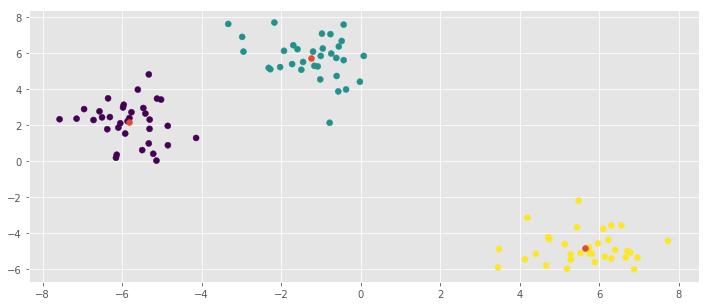

In [574]:
## Работоспособность MyKmeans
clf = MyKmeans(k=3, max_iter=1000)
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

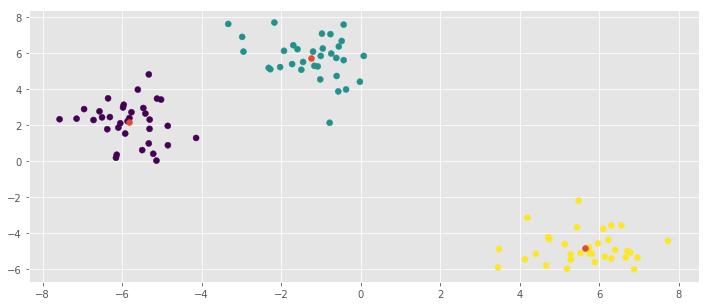

In [575]:
## Работоспособность MyKmeans++
clf = MyKmeans(k=3, max_iter=1000, init = 'k-means')
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

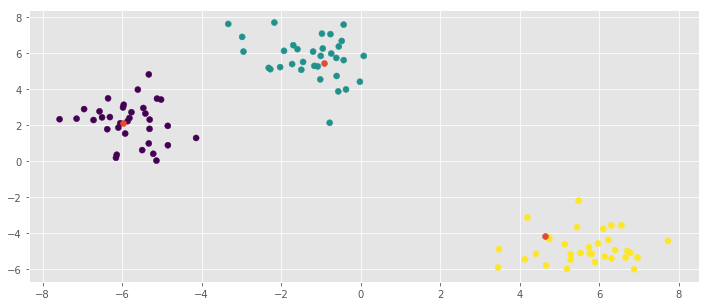

In [576]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(3, max_iter=1000)
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

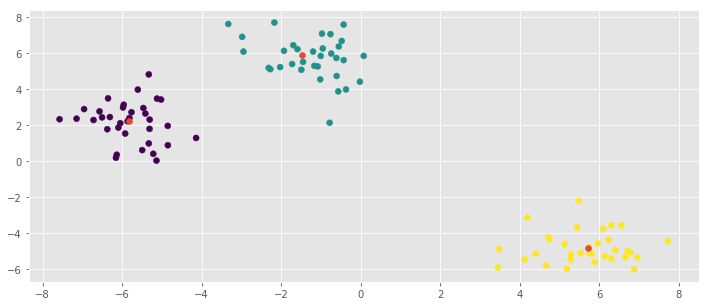

In [581]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(3, max_iter=1000, init='k-means')
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

In [540]:
## Время выполнения алгоритма Kmeans из sklearn

In [541]:
from sklearn.cluster import KMeans

In [582]:
%%timeit 
clf = KMeans(3, max_iter=1000)
clf.fit(X)

100 loops, best of 3: 11 ms per loop


In [543]:
## Время выполнения алгоритма MyKmeans

In [583]:
%%timeit 
clf = MyKmeans(k=3, max_iter=1000)
clf.fit(X)

100 loops, best of 3: 5.54 ms per loop


In [509]:
## Время выполнения алгоритма MyKmeans++

In [584]:
%%timeit 
clf = MyKmeans(k=3, max_iter=1000, init='k-means')
clf.fit(X)

100 loops, best of 3: 5.61 ms per loop


In [511]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

In [585]:
%%timeit 
clf = MiniBatchKMeans(k=3, max_iter=1000)
clf.fit(X)

100 loops, best of 3: 6.64 ms per loop


In [546]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

In [586]:
%%timeit 
clf = MiniBatchKMeans(k=3, max_iter=1000, init='k-means')
clf.fit(X)

100 loops, best of 3: 6.93 ms per loop


TOFIXIT 

In [565]:
def speed_test(model):
    model.fit(X)
    model.predict(X)

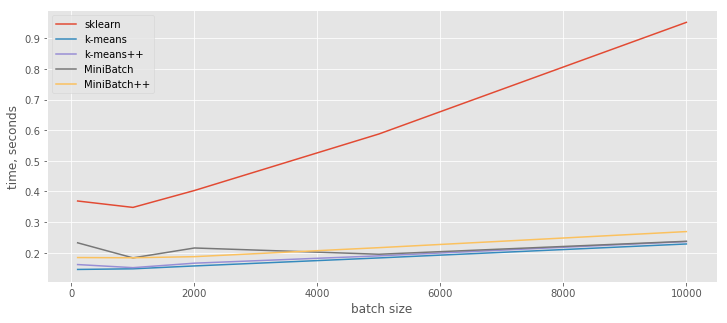

In [591]:
import timeit, functools

n = [100, 1000, 2000, 5000, 10000]
algs = ['sklearn', 'k-means', 'k-means++', 'MiniBatch', 'MiniBatch++']
time = [[], [], [], [], []]
n_clusters = 3

models = [KMeans(n_clusters=n_clusters), MyKmeans(k=n_clusters), MyKmeans(k=n_clusters, init='k-means')
          , MiniBatchKMeans(k=n_clusters), MiniBatchKMeans(k=n_clusters, init='k-means')]

num_of_launch = 25

for n_samples in n:
    X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    for i, model in enumerate(models):
        t = timeit.Timer(functools.partial(speed_test, model)) 
        time[i].append(t.timeit(num_of_launch))

for i,alg in enumerate(algs):
    plt.plot(n, time[i], label=alg)

plt.xlabel('batch size')
plt.ylabel('time, seconds')
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [552]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [592]:
n_clusters=9
top_n=5
sns = df_sns.drop(df_sns.columns[:4], axis=1)
sns = (sns - sns.mean(axis=0)) / sns.std(axis=0)

In [593]:
def prediction(model):
    model.fit(sns.values)
    y = model.predict(sns.values)
    labeled_sns = sns
    labeled_sns.loc[:, 'label'] = y
    
    for (c, group) in labeled_sns.groupby('label'):
        print('Cluster: %d' % c)
        print('Size: %d' % len(group))
        print(group.iloc[:,:-1].mean().nlargest(top_n))
        print("=" * 10 + '\n')

In [594]:
## MyKMeans

In [595]:

prediction(MyKmeans(k=n_clusters))

Cluster: 0
Size: 2257
dance     1.437309
death     1.131184
tennis    0.953811
drunk     0.773135
die       0.627503
dtype: float64

Cluster: 1
Size: 577
marching    5.315827
band        4.147122
music       0.511019
rock        0.162626
football    0.074751
dtype: float64

Cluster: 2
Size: 19391
blonde   -0.029828
soccer   -0.060816
jesus    -0.076426
bible    -0.100214
sex      -0.103942
dtype: float64

Cluster: 3
Size: 3867
shopping    1.069873
mall        0.864809
cute        0.850287
hot         0.648965
clothes     0.599525
dtype: float64

Cluster: 4
Size: 836
hollister      4.175783
abercrombie    4.001674
shopping       0.769318
mall           0.579110
clothes        0.551352
dtype: float64

Cluster: 5
Size: 826
kissed    3.552913
drugs     3.160755
hair      2.786331
sex       2.348063
die       1.593357
dtype: float64

Cluster: 6
Size: 510
bible     5.175100
jesus     2.719659
god       2.650477
church    1.667868
music     0.235953
dtype: float64

Cluster: 7
Size: 578
baseba

In [ ]:
## MyKMeans++

In [ ]:
## MyKMeans с MiniBatchMyKMeans

In [ ]:
## MyKMeans++ с MiniBatchMyKMeans

In [ ]:
## Вывод